In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from requirements import load_hindi_dataset

In [2]:
datasetPath = "./requirements/data2.csv"
(hindiData, hindiLabels) = load_hindi_dataset.load_hindi_data(datasetPath)

In [5]:
train_x, test_x, train_y, test_y = train_test_split(hindiData, hindiLabels, test_size = 0.2)
word_dict = {0:'क',1:'ख',2:'ग',3:'घ',4:'ड़',5:'च',6:'छ',7:'ज',8:'झ',9:'ञ',10:'ट',11:'ठ',12:'ड',13:'ढ',14:'ण',15:'त',16:'थ',17:'द',18:'ध',19:'न',20:'प',21:'फ',22:'ब',23:'भ', 24:'म',25:'य',26:'र',27:'ल',28:'व',29:'श',30:'ष',31:'स',32:'ह',33:'क्ष',34:'त्र',35:'ज्ञ',36:'०',37:'१',38:'२',39:'३',40:'४',41:'५',42:'६',43:'७',44:'८',45:'९'}

In [8]:
from keras.models import load_model
predModel = load_model("charModel.h5")

In [26]:
pred = predModel.predict(test_x)

575/575 [==============================] - 7s 13ms/step


In [34]:
pred[0]

array([1.9691419e-10, 3.0625272e-14, 1.1684956e-13, 9.6493239e-15,
       1.7097653e-04, 9.3091938e-16, 5.3807919e-10, 2.7707889e-09,
       2.0398741e-13, 7.6553218e-14, 8.6459215e-11, 1.7626975e-11,
       9.9982858e-01, 1.1664166e-08, 9.4877916e-19, 3.3288974e-14,
       1.5993655e-18, 3.9792734e-09, 7.8393329e-17, 2.6798870e-16,
       4.2656033e-17, 1.2433525e-12, 2.5156496e-12, 6.2652157e-18,
       3.6548688e-20, 6.9746513e-18, 7.3329134e-11, 6.2190487e-13,
       1.9108469e-12, 2.3048165e-19, 8.6148579e-15, 6.4717040e-15,
       7.7270506e-08, 3.5459819e-13, 1.1643371e-10, 8.0186590e-13,
       6.7958619e-14, 5.3679485e-17, 6.1633878e-15, 6.2900476e-11,
       6.5847367e-15, 8.7040059e-13, 8.0502618e-12, 5.6055383e-15,
       1.1626138e-12, 1.9214929e-07], dtype=float32)

In [32]:
np.shape(pred)

(18400, 46)

In [51]:
predResult = []
for i in range(len(pred)):
    predResult.append(np.argmax(pred[i]))
np.array(predResult)

In [52]:
from pandas import to_numeric


realResult = []
for i in range(len(test_y)):
    realResult.append(to_numeric(test_y[i]))
np.array(predResult)

In [55]:
confusion_matrix = metrics.confusion_matrix(realResult, predResult)

In [67]:
print(confusion_matrix)

[[424   0   1 ...   0   0   0]
 [  0 402   0 ...   0   0   0]
 [  0   0 404 ...   0   0   0]
 ...
 [  0   0   0 ... 437   0   0]
 [  0   0   0 ...   0 401   0]
 [  0   0   0 ...   0   0 393]]


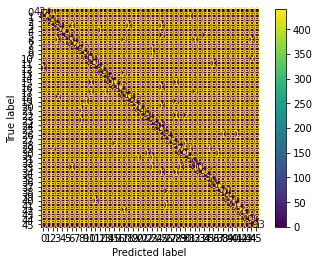

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, )
disp.plot()